<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/fall-24/notebooks/Geopandas_for_geometric_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to GeoPandas

This quick tutorial introduces the key concepts and basic features of GeoPandas.

## Concepts

GeoPandas, as the name suggests, extends the popular data science library [pandas](https://pandas.pydata.org) by adding support for geospatial data. [If you are not familiar with `pandas`, you can take a quick look at its [Getting started documentation](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) before proceeding.]

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, that can store geometry columns and perform spatial operations. Therefore, your `GeoDataFrame` is a combination of traditional data (numerical, boolean, text etc.), and a column with geometries (points, polygons etc.).

![geodataframe schema](https://raw.githubusercontent.com/geopandas/geopandas/8279cc33bf46dcf23bbe8cf92179951e673bea68/doc/source/_static/dataframe.svg)

Each `GeoDataFrame` can contain any geometry type and has a `crs` attribute, which stores information about the projection (CRS stands for Coordinate Reference System).

`geopandas` also provides simple visualization capacity that you can make a quick map.

Now let's see how to use `geopandas` with some real data.


In [1]:
import geopandas

### Reading files

`geopandas` can read in popular GIS data files including shapefiles, GeoJSON, GeoPackage, etc. You can read it using `geopandas.read_file()` function, which automatically detects the filetype and creates a GeoDataFrame.

So here I put some files in our course Github repository:

That you can fetch directly from an URL.

In [2]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/earthquake_2.5_month.geojson"

earthquakes = geopandas.read_file(url)

A quick view of the data can be down by using the `.plot()` function to your `GeoDataFrame`.

<Axes: >

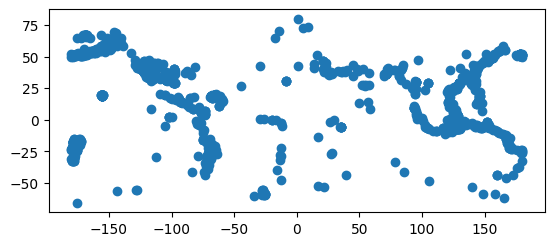

In [3]:
earthquakes.plot()

Download a world country shapefile from [here](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore?location=-0.755783%2C0.000000%2C2.03). Click Download - > GEOJSON format. You can then upload to your own Google Drive. Here, for demostration purpose, I have uploaded a copy to the course github site. And you can directly read in the data from there.


In [4]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/fall-24/data/countries.geojson"

In [5]:
countries = geopandas.read_file(url)

Check the `CRS`

In [6]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
countries = countries.to_crs("EPSG:3857")

In [8]:
countries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

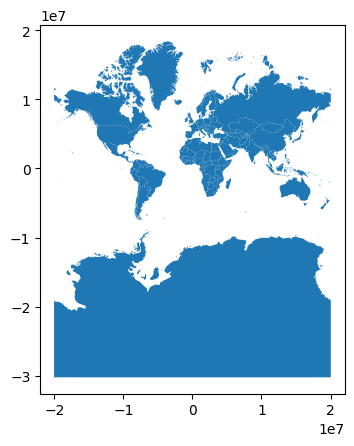

In [9]:
countries.plot()

## Simple attributes and functions

Now we have our `GeoDataFrame` and can start working with its geometry.

### Measuring area

To measure the area of each polygon, access the `GeoDataFrame.area` attribute, which returns a column.


In [10]:
countries.area # the unit here is square meters

,0
0,9.346494e+11
1,5.058670e+10
2,3.014489e+12
3,1.754581e+08
4,9.349956e+08
...,...
246,3.577962e+11
247,1.711690e+08
248,4.935727e+11
249,8.010726e+11


You can also create a new column in the `GeoDataFrame` called `area_km2` to store the calculated area in km2 unit.

In [11]:
countries["area_km2"] = countries.area/1000/1000 # do a simple math to change to square km2
countries

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.810 4246712.610, 6823482.060...",9.346494e+05
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 5113950.867, 2179852.165...",5.058670e+04
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.030 4423494.247, 516027.527 4...",3.014489e+06
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1617338.540, -1900773...",1.754581e+02
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 5251578.747, 165479.439 5...",9.349956e+02
...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((11919975.671 1933404.703, 1192...",3.577962e+05
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-19821639.593 -1611402.115, -1...",1.711690e+02
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((5260340.777 1530115.438, 52508...",4.935727e+05
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((3363297.789 -1687093.287, 3363981.86...",8.010726e+05


Let's find out which country has the largest/smallest area? Have a guess before running the command?

Here we can call the `.sort_values()` function and it takes two important parameters:
- the column that we are using to sort. Here we use `area_km2`.
- whether it is sorted ascendingly (let `ascending=True`) or descendingly (let `ascending=False`).

In [12]:
countries.sort_values('area_km2', ascending=False)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2
7,8,Antarctica,AQ,None,None,1564.144143,5672.928286,"MULTIPOLYGON (((-20037507.067 -19140932.929, -...",6.966117e+08
184,185,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-20037507.067 10744606.424, -2...",8.304711e+07
41,42,Canada,CA,Canada,CA,2210.684826,1694.025240,"MULTIPOLYGON (((-9688723.272 9735729.723, -969...",5.119443e+07
90,91,Greenland,GL,Denmark,DK,942.221329,660.927165,"MULTIPOLYGON (((-5665945.564 10647676.549, -56...",3.522470e+07
238,239,United States,US,United States,US,726.106056,1116.670604,"MULTIPOLYGON (((-8504253.492 4754669.580, -850...",2.172895e+07
...,...,...,...,...,...,...,...,...,...
87,88,Gibraltar,GI,United Kingdom,GB,0.144833,0.000786,"POLYGON ((-593834.805 4323013.059, -594165.765...",1.205802e+01
226,227,Tokelau,TK,New Zealand,NZ,0.108696,0.000606,"POLYGON ((-19130037.994 -1030699.152, -1913124...",7.610015e+00
116,117,Juan De Nova Island,TF,France,FR,0.092503,0.000487,"POLYGON ((4759123.754 -1929687.405, 4757965.03...",6.313204e+00
88,89,Glorioso Islands,TF,France,FR,0.079231,0.000407,"POLYGON ((5264947.395 -1297694.436, 5263417.31...",5.152374e+00


Does the ranking make any sense, if not, why?

### Getting polygon boundary and centroid

To get the boundary of each polygon (LineString), access the `GeoDataFrame.boundary`:

<Axes: >

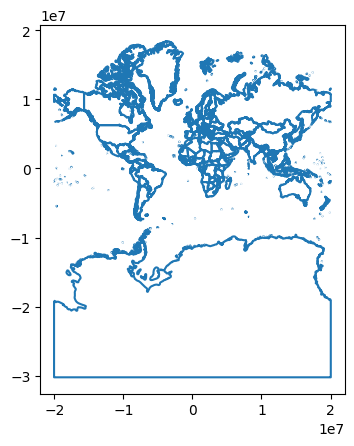

In [13]:
countries.boundary.plot()


Similarly we can get centroids from the country polygons.

Or create a circle buffer of each location using `.buffer` and specify a distance.

We can do this for the earthquake data and create a 500,000m buffer zone to highlight the affected earea. But first, we need to make sure the two data are in the same CRS.

In [14]:
earthquakes = earthquakes.to_crs("EPSG:3857")

<Axes: >

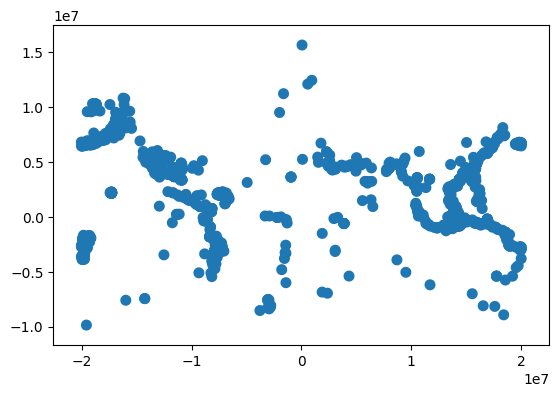

In [15]:
earthquakes.buffer(500000).plot()

## Making maps

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call `GeoDataFrame.plot()`. To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the `"area"` column. We also want to show a legend (`legend=True`).

<Axes: >

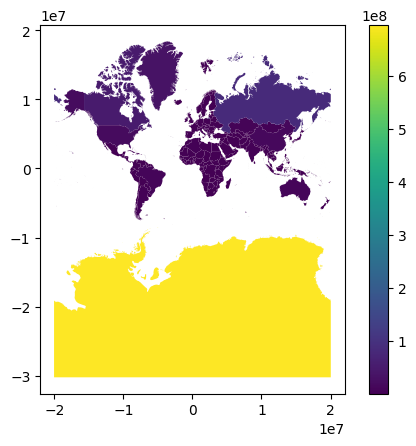

In [16]:
countries.plot("area_km2", legend=True)

More often we need to overlay multiple layers on top of each other. Here we need to put them on the same `axis`.

First, create the first layer and named it as `ax`. Then plot the second layer, and within the `plot()` function, write down `ax=ax`.

You can also set some level of transparency by including `alpha=0.2` in the plot function.

<Axes: >

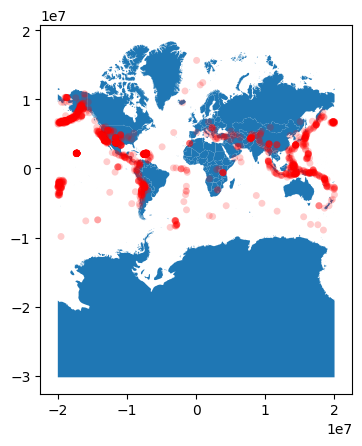

In [17]:
ax = countries.plot()

earthquakes.centroid.buffer(500000).plot(ax=ax,color='red',alpha=0.2)

## Geometric relationships
The most commonly used operation is called spatial join:

- `GeoDataFrame.sjoin`

A spatial join can merge two `GeoDataFrame`s, one left, one right based on a `predicate`. The predicate can be, for example, `within`,`intersects`, `contains`, etc., for different operations.

![spatial join schema](https://datavisdotblog.files.wordpress.com/2022/01/spatial-joins-header.png?w=1204)



The results of the spatial join will be a new `GeoDataFrame` with all information from both the `GeoDataFrame` tables that meet the speficied `predicate` condition.

Here, if the interest is to count how many earthquakes fall within each country, then we will be joining the country GeoDataFrame with the earthquakes GeoDataFrame with `predicate="contains"`.

This is actually a quite complex step, so I write a helper function `count_points_in_polygon` that takes three parameters:
- the polygons GeoDataFrame,
- the points GeoDataFrame, and
- the textID name in the polygon GeoDataFrame. Here the id used is "COUNTRY".

The function will return a list of countries with # of earthquakes as a seperate column.

I don't expect you to write this function. But you will need to know how to use this function to another task if count points in polygon is needed.

In [18]:
def count_points_in_polygon(polygons, points, id_column):
    # Perform spatial join where polygons contain points
    joined = geopandas.sjoin(polygons, points, predicate="contains")

    # Group by polygon ID and count the points
    counts = joined.groupby(id_column).size().rename("n_points")

    # Reindex to ensure all polygons are included, including those with zero points
    counts = counts.reindex(polygons[id_column]).fillna(0).astype(int)

    results = polygons.copy()
    results["counts"] = counts.values
    # Return the polygons with the point counts as a new column
    return results

Call the function, by passing three parameters into the function
- your countries GeoDataFrame `countries`
- your earthquakes GeoDataFrame `earthquakes`
- the polygon ID in your countries GeoDataFrame `COUNTRY`

In [19]:
results = count_points_in_polygon(countries, earthquakes,"COUNTRY")
results.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2,counts
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.810 4246712.610, 6823482.060...",9.346494e+05,13
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 5113950.867, 2179852.165...",5.058670e+04,1
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.030 4423494.247, 516027.527 4...",3.014489e+06,0
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1617338.540, -1900773...",1.754581e+02,0
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 5251578.747, 165479.439 5...",9.349956e+02,0


Then we can join it back to the original GeoDataFrame using common country name, then make a map of it.

<Axes: >

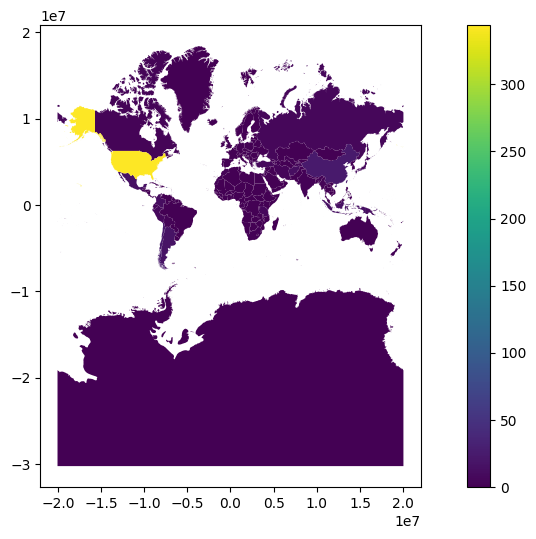

In [20]:
results.plot("counts", legend=True, figsize=(12,6))

## What next?

With GeoPandas we can do much more than what has been introduced so far, from [aggregations](../docs/user_guide/aggregation_with_dissolve.rst), to [spatial joins](../docs/user_guide/mergingdata.rst), to [geocoding](../docs/user_guide/geocoding.rst), and [much more](../gallery/index.rst).

Head over to the [user guide](../docs/user_guide.rst) to learn more about the different features of GeoPandas, the [Examples](../gallery/index.rst) to see how they can be used, or to the [API reference](../docs/reference.rst) for the details.